# Executive Summary

# Introduction

In [361]:
library(plyr) # data manipulation @HWickham2009
library(dplyr) # data manipulation @HWickham@2017
library(knitr) # dynamic report generation @YXie2012
library(igraph) # for graph/network analysis @GCsardiTNepusz2006
library(ggraph) # graph visualization in the style of ggplot @TPederson2016a
library(netrankr) # network centrality @DSchoch2015
library(ggplot2) # for plotting visualizations @HWickham2007
library(ggforce) # adds functionality to ggplot2, eg. geom_circle @TPederson2016b
library(ggrepel) # adds 'repellent' non-overlapping labels to ggplot @KSlowikowski2016
library(pheatmap) # prettier heat maps
library(RColorBrewer) # color palettes
library(docstring) # allows ?help to display function descriptions analogous to Pythonic docstrings

In [2]:
DrawPitch <- function(lengthPitch=105, widthPitch=68, arrow=c("none", "r", "l"), theme=c("light", "dark", "grey", "grass")) {
    #' Draw regulation football pitch with penalty areas and centre circle.
    #' Adapted from https://github.com/JoGall/soccermatics
  
  # define colours by theme
  if(theme[1] == "grass") {
    fill1 <- "#008000"
    fill2 <- "#328422"
    colPitch <- "grey85"
    arrowCol <- "white"
    colText <- "white"
  } else if(theme[1] == "light") {
    fill1 <- "grey98"
    fill2 <- "grey98"
    colPitch <- "grey60"
    arrowCol = "black"
    colText <- "black"
  } else if(theme[1] %in% c("grey", "gray")) {    
    fill1 <- "#A3A1A3"
    fill2 <- "#A3A1A3"
    colPitch <- "white"
    arrowCol <- "white"
    colText <- "black"
  } else if(theme[1] == "dark") {  
    fill1 <- "#1C1F26"
    fill2 <- "#1C1F26"
    colPitch <- "white"
    arrowCol <- "white"
    colText <- "white"
  } else if(theme[1] == "blank") {
    fill1 <- "white"
    fill2 <- "white"
    colPitch <- "white"
    arrowCol <- "black"
    colText <- "black"
  }
  lwd <- 0.5
  
  border <- c(5, 5, 5, 5)
      
  # mowed grass lines
  lines <- (lengthPitch + border[2] + border[4]) / 13
  boxes <- data.frame(start = lines * 0:12 - border[4], end = lines * 1:13 - border[2])[seq(2, 12, 2),]
  
  # draw pitch
  p <- ggplot() +
    # background
    geom_rect(aes(xmin = -border[4], xmax = lengthPitch + border[2], ymin = -border[3], ymax = widthPitch + border[1]), fill = fill1) +
    # mowed pitch lines
    geom_rect(data = boxes, aes(xmin = start, xmax = end, ymin = -border[3], ymax = widthPitch + border[1]), fill = fill2) +
    # perimeter line
    geom_rect(aes(xmin = 0, xmax = lengthPitch, ymin = 0, ymax = widthPitch), fill = NA, col = colPitch, lwd = lwd) +
    # centre circle
    geom_circle(aes(x0 = lengthPitch/2, y0 = widthPitch/2, r = 9.15), col = colPitch, lwd = lwd) +
    # kick off spot
    geom_circle(aes(x0 = lengthPitch/2, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    # halfway line
    geom_segment(aes(x = lengthPitch/2, y = 0, xend = lengthPitch/2, yend = widthPitch), col = colPitch, lwd = lwd) +
    # penalty arcs
    geom_arc(aes(x0= 11, y0 = widthPitch/2, r = 9.15, start = pi/2 + 0.9259284, end = pi/2 - 0.9259284), col = colPitch, lwd = lwd) +
    geom_arc(aes(x0 = lengthPitch - 11, y0 = widthPitch/2, r = 9.15, start = pi/2*3 - 0.9259284, end = pi/2*3 + 0.9259284), 
             col = colPitch, lwd = lwd) +
    # penalty areas
    geom_rect(aes(xmin = 0, xmax = 16.5, ymin = widthPitch/2 - 20.15, ymax = widthPitch/2 + 20.15), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch - 16.5, xmax = lengthPitch, ymin = widthPitch/2 - 20.15, ymax = widthPitch/2 + 20.15), 
              fill = NA, col = colPitch, lwd = lwd) +
    # penalty spots
    geom_circle(aes(x0 = 11, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    geom_circle(aes(x0 = lengthPitch - 11, y0 = widthPitch/2, r = 0.25), fill = colPitch, col = colPitch, lwd = lwd) +
    # six yard boxes
    geom_rect(aes(xmin = 0, xmax = 5.5, ymin = (widthPitch/2) - 9.16, ymax = (widthPitch/2) + 9.16), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch - 5.5, xmax = lengthPitch, ymin = (widthPitch/2) - 9.16, ymax = (widthPitch/2) + 9.16), 
              fill = NA, col = colPitch, lwd = lwd) +
    # goals
    geom_rect(aes(xmin = -2, xmax = 0, ymin = (widthPitch/2) - 3.66, ymax = (widthPitch/2) + 3.66), fill = NA, col = colPitch, lwd = lwd) +
    geom_rect(aes(xmin = lengthPitch, xmax = lengthPitch + 2, ymin = (widthPitch/2) - 3.66, ymax = (widthPitch/2) + 3.66), 
              fill = NA, col = colPitch, lwd = lwd) +
    coord_fixed() +
    theme(rect = element_blank(), 
          line = element_blank(),
          axis.text = element_blank(),
          axis.title = element_blank())
    
  # add arrow
  if(arrow[1] == "r") {
    p <- p + 
      geom_segment(aes(x = 0, y = -2, xend = lengthPitch / 3, yend = -2), 
                   colour = arrowCol, size = 1.5, arrow = arrow(length = unit(0.2, "cm"), type="closed"), linejoin='mitre')
  } else if(arrow[1] == "l") {
    p <- p + 
      geom_segment(aes(x = lengthPitch, y = -2, xend = lengthPitch / 3 * 2, yend = -2), 
                   colour = arrowCol, size = 1.5, arrow = arrow(length = unit(0.2, "cm"), type="closed"), linejoin='mitre')
  }
      
  return(p)
}

# Data

In [3]:
LoadAndScaleData <- function(national_league) {
    #' Load preprocessed event logs for given national league.
    
    events <- read.csv(paste0('../data/processed/', national_league, '.csv'))

    x_scale <- 105
    y_scale <- 68

    events$location_x <- events$location_x/100 * x_scale
    events$target_x <- events$target_x/100 * x_scale

    events$location_y <- y_scale - (events$location_y/100 * y_scale)
    events$target_y <- y_scale - (events$target_y/100 * y_scale)
    
    return(events)
}


In [4]:
events <- LoadAndScaleData('England')

In [540]:
LeagueResults <- function(league){

    teams <- sort(unique(league$team))

    home_score <- matrix(0, nrow=20, ncol=20)
    colnames(home_score) <- teams
    rownames(home_score) <- teams

    away_score <- home_score

    league_table <- matrix(0, nrow=20, ncol=8)
    rownames(league_table) <- teams
    colnames(league_table) <- c('POS','PTS','W','D','L','GF','GA','GD')

    return(list(league_table, home_score, away_score))
}

In [541]:
v <- LeagueResults(events)

In [560]:
hs <- v[[2]]

In [511]:
league <- events

In [539]:
teams <- sort(unique(league$team))

home_score <- matrix(0, nrow=20, ncol=20)
colnames(home_score) <- teams
rownames(home_score) <- teams

away_score <- home_score

league_table <- matrix(0, nrow=20, ncol=8)
rownames(league_table) <- teams
colnames(league_table) <- c('POS','PTS','W','D','L','GF','GA','GD')

In [ ]:
for m in unique(league$matchId){
    
    match <- league[league$matchId==m,]
    home_team <- unique(match[match$home_or_away=='Home']$team)
    away_team <- unique(match[match$home_or_away=='Away']$team)
    home_goals <- nrow(match[match$to_team=='Home Goal',])
    away_goals <- nrow(match[match$to_team=='Away Goal',])
    
    home_score[home_team, away_team] <- home_goals
    away_score[home_team, away_team] <- away_goals
    
    league_table[]
       
        league_table[team]
    }
    
    
}

In [525]:
league_table

,POS,PTS,W,D,L,GF,GA,GD
AFC Bournemouth,0,0,0,0,0,0,0,0
Arsenal,0,0,0,0,0,0,0,0
Brighton & Hove Albion,0,0,0,0,0,0,0,0
Burnley,0,0,0,0,0,0,0,0
Chelsea,0,0,0,0,0,0,0,0
Crystal Palace,0,0,0,0,0,0,0,0
Everton,0,0,0,0,0,0,0,0
Huddersfield Town,0,0,0,0,0,0,0,0
Leicester City,0,0,0,0,0,0,0,0
Liverpool,0,0,0,0,0,0,0,0


In [510]:
for (match in unique(events$matchId)){

    goals <- 0

}

ERROR: Error in dimnames(x) <- dn: length of 'dimnames' [2] not equal to array extent


In [475]:
mId <- unique(events$matchId)[1]

In [477]:
m <- events[events$matchId==mId,]

In [481]:
home_goals <- m[m$to_team=='Home Goal',]

In [483]:
away_goals <- m[m$to_team=='Away Goal',]

In [485]:
home_goals <- matrix(0, nrow=20, ncol=20)

In [486]:
away_goals <- matrix(0, nrow=20, ncol=20)

In [494]:
colnames(home_goals) <- teams

In [495]:
rownames(home_goals) <- teams

In [ ]:
home

In [496]:
home_goals

,AFC Bournemouth,Arsenal,Brighton & Hove Albion,Burnley,Chelsea,Crystal Palace,Everton,Huddersfield Town,Leicester City,Liverpool,Manchester City,Manchester United,Newcastle United,Southampton,Stoke City,Swansea City,Tottenham Hotspur,Watford,West Bromwich Albion,West Ham United
AFC Bournemouth,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Arsenal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Brighton & Hove Albion,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Burnley,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Chelsea,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Crystal Palace,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Everton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Huddersfield Town,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Leicester City,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Liverpool,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [488]:
teams <- sort(unique(events$team))

In [5]:
ShowMatchEvents <- function(events, match_id, team_name, home_or_away='Home', flip=F) {
    #' Visualize events on pitch for given match and team.
    
    # select match
    game <- events[events$matchId==match_id,]
    goals <- game[game$subEventName=='Goal',]
    
    # note teams
    teams <- unique(game$team)

    # limit events to team specified by name or home/away
    if(!missing(team_name)){
        game <- game[game$team==team_name,]
        home_or_away <- unique(game$home_or_away)
    } else {
        game <- game[game$home_or_away==home_or_away,]
        team_name <- unique(game$team)
    }
    
    # note opposition
    opposition <- teams[teams!=team_name]
    
    # get score
    team_score <- table(goals$team)[team_name]
    opposition_score <- table(goals$team)[opposition]
    
    # flip coordinates if desired
    if (flip==T) {
        game$location_x <- 105 - game$location_x
        game$location_y <- 68 - game$location_y
        direction_of_play = 'l'
    } else { 
        direction_of_play = 'r'
    }
    
    # limit attention to main events
    game_events <- game[game$eventName == 'Pass'| 
                        game$eventName == 'Shot' | 
                        game$eventName == 'On the Ball' | 
                        game$eventName == 'Challenge' | 
                        game$eventName == 'Free Kick',]

    # draw pitch
    p <- DrawPitch(theme='grey', arrow=direction_of_play) + 
        geom_point(data = game_events, 
               aes(location_x , location_y, fill=eventName, shape=eventName), pch=21, alpha=0.6, size=2 ) + 
        geom_point(data=game_events[game_events$subEventName=='Goal',], 
                   aes(location_x, location_y), shape=13, size=5) +
        geom_label_repel(data=game_events[game_events$subEventName=='Goal',], 
                         aes(location_x, location_y, label = paste0(source,'(',matchPeriod,' ',time,')')), label.padding=0.1, size=2.3, alpha=1) +
        theme(legend.direction='horizontal', legend.position=c(0.5,0)) +
        scale_fill_manual(values=c("red", "black", 'white', "yellow", 'blue'), name='Event Type') +
        ggtitle(paste('Event Map:', team_name,'playing',home_or_away,'versus',opposition,'(',team_score,'-',opposition_score,')'))
    
    return(p)
    
}

In [6]:
match_id <- '2500032'

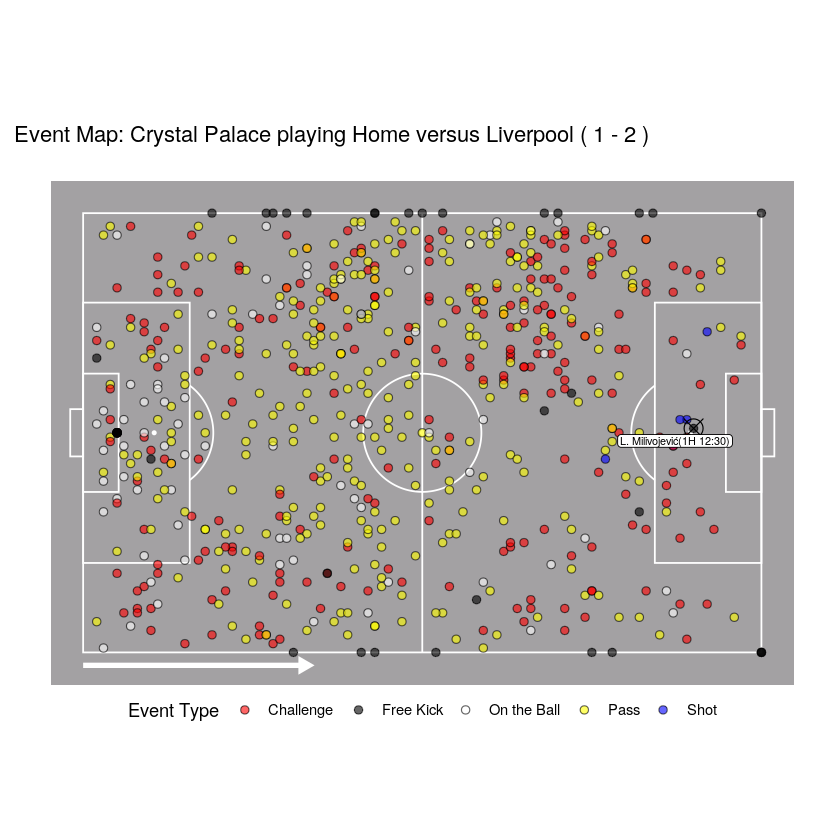

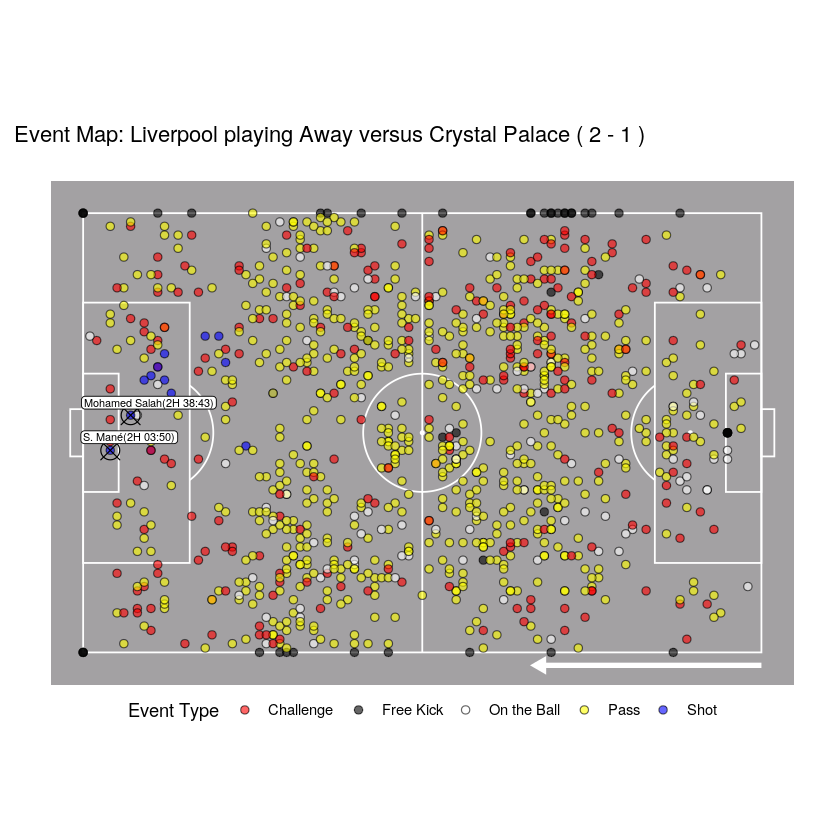

In [7]:
ShowMatchEvents(events, match_id, home_or_away='Home')
ShowMatchEvents(events, match_id, home_or_away='Away', flip=T)

In [8]:
ShowPassesAndShots <- function(events, match_id, team_name, home_or_away='Home', flip=F) {
    #' Visualize passes on pitch for given match and team.
    
    # select match
    game <- events[events$matchId==match_id,]
    goals <- game[game$subEventName=='Goal',]
    
    # note teams
    teams <- unique(game$team)

    # limit events to team specified by name or home/away
    if(!missing(team_name)){
        game <- game[game$team==team_name,]
        home_or_away <- unique(game$home_or_away)
    } else {
        game <- game[game$home_or_away==home_or_away,]
        team_name <- unique(game$team)
    }
    
    # note opposition
    opposition <- teams[teams!=team_name]
    
    # get score
    team_score <- table(goals$team)[team_name]
    opposition_score <- table(goals$team)[opposition]
    
    # flip coordinates if desired
    if (flip==T) {
        game$location_x <- 105 - game$location_x
        game$target_x <- 105 - game$target_x
        game$location_y <- 68 - game$location_y
        game$target_y <- 68 - game$target_y
        direction_of_play = 'l'
    } else { 
        direction_of_play = 'r'
    }
    
    # limit attention to passes and shots
    passes <- game[game$eventName == 'Pass' & game$team == team_name,]
    shots <- game[(game$eventName=='Shot' | game$subEventName=='Goal') & game$team==team_name,]
    
    # draw pitch
    p <- DrawPitch(theme='grass', arrow=direction_of_play) + 
        geom_segment(data=na.exclude(passes), 
                     aes(x=location_x, y=location_y, xend=target_x, yend=target_y, color=subEventName), 
                     alpha=0.6, arrow = arrow(length = unit(0.1,"cm"))) +
        geom_label_repel(data=game[game$subEventName=='Goal',], 
                     aes(location_x, location_y, label = paste0(source,'(',matchPeriod,' ',time,')')), label.padding=0.1, size=2.3, alpha=1) + 
        geom_segment(data=na.exclude(shots), 
                 aes(x=location_x, y=location_y, xend=target_x, yend=target_y, color=subEventName), 
                 alpha=0.7, arrow = arrow(length = unit(0.1,"cm"))) +
        theme(legend.position=c(0.5,-0.01), legend.direction='horizontal',
              legend.background=element_rect(fill='#008000', linetype='solid')) +
        scale_color_manual(values=c("red", "black", 'blue', 'orange', "yellow", 'grey', 'purple', 'white','brown'), name='Pass Type') +
        ggtitle(paste('Pass Map:',team_name,'playing',home_or_away,'versus',opposition,'(',team_score,'-',opposition_score,')'))
    
    return(p)
} 

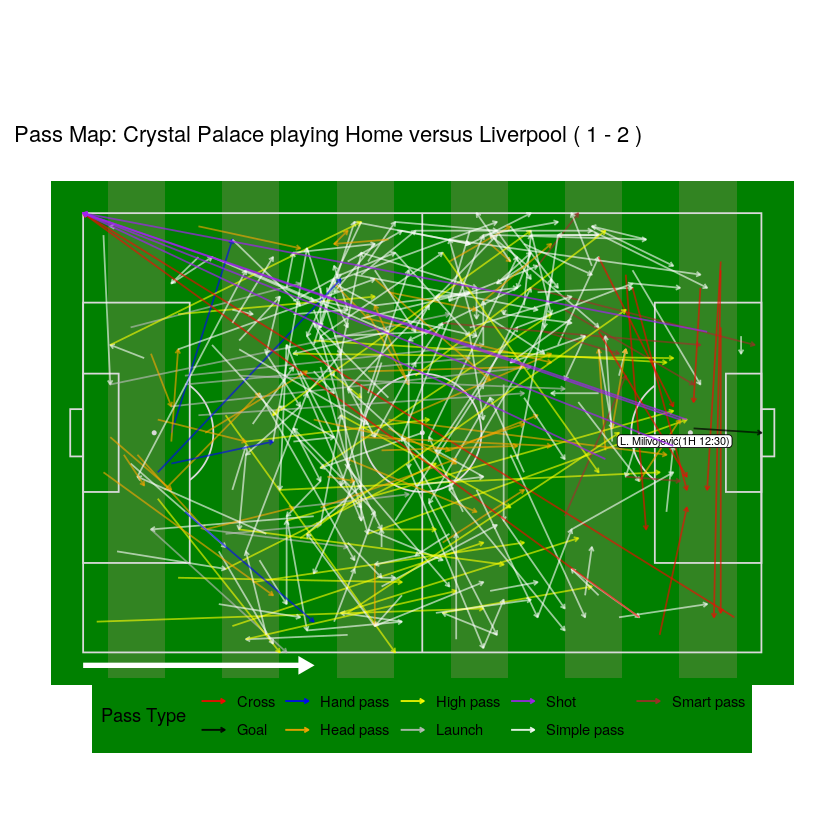

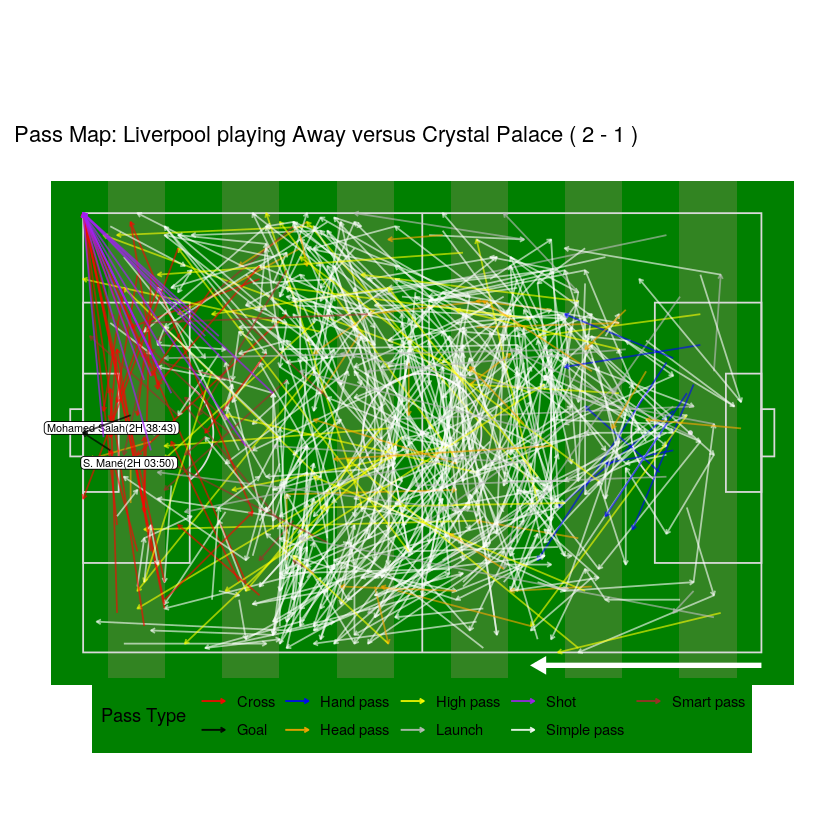

In [9]:
ShowPassesAndShots(events, match_id, home_or_away='Home')
ShowPassesAndShots(events, match_id, home_or_away='Away', flip=T)

# Methodology

In [310]:
PassNetwork <- function(events, match_id, team_name, team_colour='red', home_or_away='Home', flip=F, lower_threshold=1, high_threshold=10) {
    #' Draw Pass Map of First XI with nodes placed on mean (x,y) pitch-coordinates.

    game <- events[events$matchId == match_id,]
    goals <- game[game$subEventName=='Goal',]
    
    # note teams
    teams <- unique(game$team)

    # limit events to team specified by name or home/away
    if(!missing(team_name)){
        game <- game[game$team==team_name,]
        home_or_away <- unique(game$home_or_away)
    } else {
        game <- game[game$home_or_away==home_or_away,]
        team_name <- unique(game$team)
    }
    
    # note opposition
    opposition <- teams[teams!=team_name]
    
    # get score
    team_score <- table(goals$team)[team_name]
    opposition_score <- table(goals$team)[opposition]
    
    
    firstXI <- game[game$FirstXI == 'True',]
    mean_positions <- firstXI[firstXI$location_x>0 & firstXI$location_y>0 & firstXI$location_x<105 & firstXI$location_y<68,] %>% 
        group_by(team, matchId, source) %>%
          dplyr::summarise(x_mean = mean(location_x), y_mean = mean(location_y)) %>% 
          ungroup() %>%
          mutate(team = as.factor(team), id = as.factor(matchId)) %>%
          as.data.frame()


    pass_counts <- ddply(data.frame(game$source, game$target),.(game.source,game.target),nrow)
    names(pass_counts) <- c('source','target','passcount')
    step1 <- merge(mean_positions, pass_counts, by='source')
    step2 <- step1[,c(1,4,5,7,8)]
    names(step2)[2:3] <- c('source_x','source_y')
    names(mean_positions)[3] <- 'target'
    step3 <- merge(mean_positions, step2, by='target')
    team <- step3[step3$team==team_name,]

    if (flip==T) {
        team$source_x <- 105 - team$source_x
        team$x_mean <- 105 - team$x_mean
        team$source_y <- 68 - team$source_y
        team$y_mean <- 68 - team$y_mean
        mean_positions$x_mean <- 105 - mean_positions$x_mean
        mean_positions$y_mean <- 68 - mean_positions$y_mean
    }

    return (DrawPitch() +
        geom_segment(data=team[team$passcount>=lower_threshold,], size=1, colour=team_colour,
                     aes(x=source_x, y=source_y, xend=x_mean, yend=y_mean, alpha=passcount)) +
        geom_segment(data=team[team$passcount>=high_threshold,], size=1.5, colour='black',
                     aes(x=source_x, y=source_y, xend=x_mean, yend=y_mean, alpha=passcount)) +
        geom_label_repel(data = mean_positions[mean_positions$team==team_name,], 
                         aes(x_mean, y_mean, label = target), label.padding=0.1, size=2.3, alpha=1) +
        geom_point(data=team, aes(x_mean, y_mean,), fill=team_colour, colour='black', pch=21, size=3) +
        ggtitle(paste('Passing Network:',team_name,'playing',home_or_away,'versus',opposition,'(',team_score,'-',opposition_score,')')) +
        theme(legend.position=c(0.5,0.07), legend.direction='horizontal'))
    
}

`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)
`summarise()` regrouping output by 'team', 'matchId' (override with `.groups` argument)


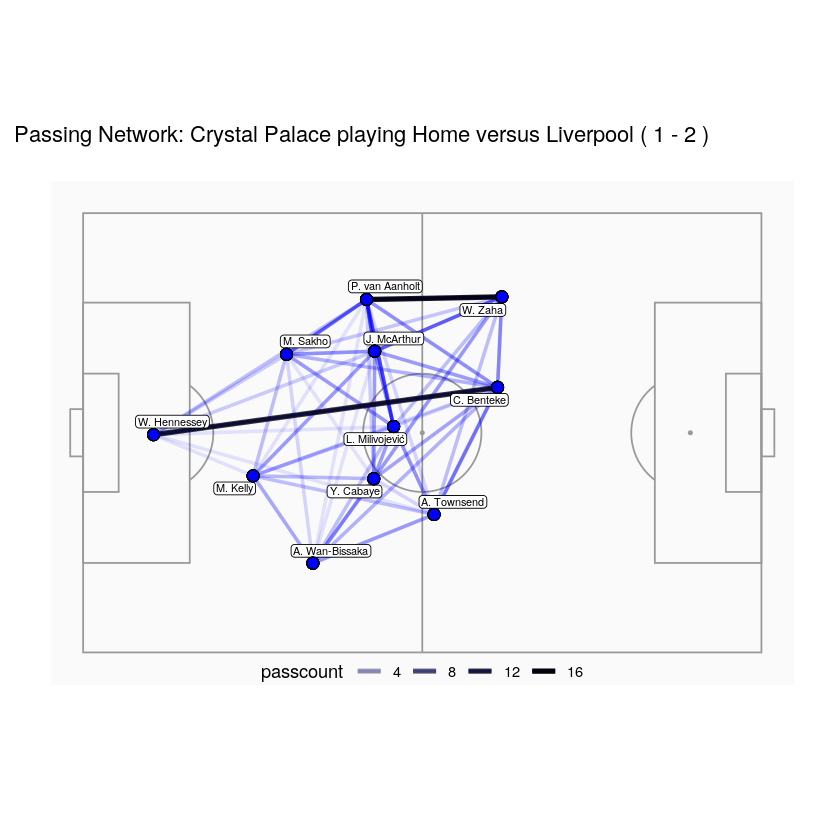

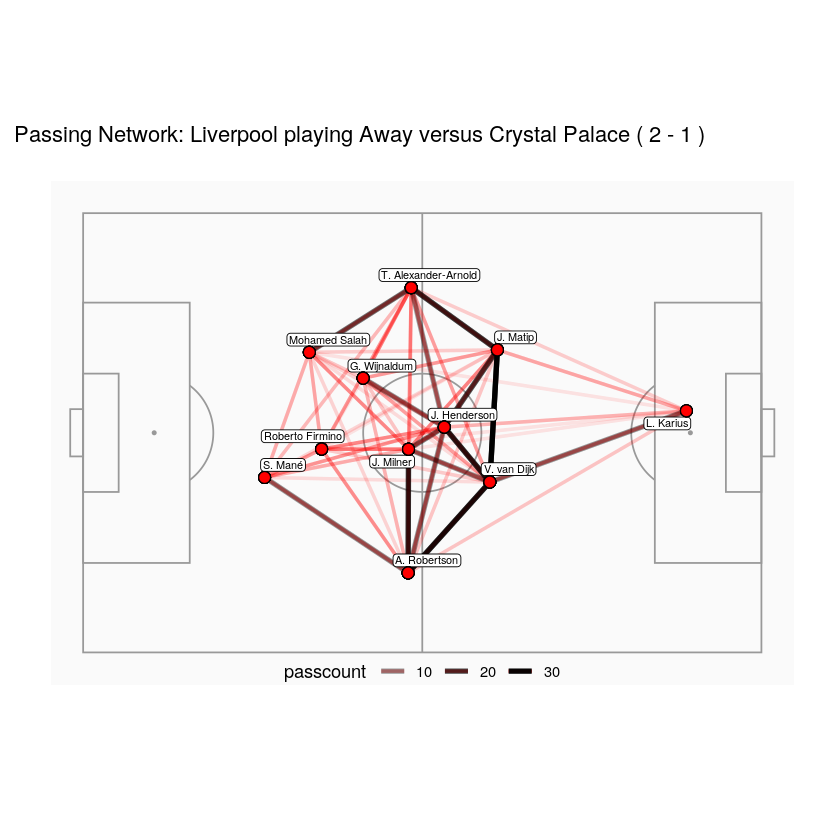

In [311]:
PassNetwork(events, match_id, team_colour='blue')
PassNetwork(events, match_id, home_or_away='Away', flip=T)

In [400]:
GameGraph <- function(events, match_id, team_name, home_or_away='Home') {
    #' Return Possession Graph for given Match and Team.
    
    game <- events[events$matchId == match_id,]
    game <- game[game$source!='' & game$target!='nan',]
    
     # note teams
    teams <- unique(game$team)

    # limit events to team specified by name or home/away
    if(!missing(team_name)){
        team_game <- game[game$team==team_name,]
        home_or_away <- unique(team_game$home_or_away)
    } else {
        team_game <- game[game$home_or_away==home_or_away,]
        team_name <- as.character(unique(team_game$team))
    }

    opposition_game <- game[game$team != team_name,]
    opposition_team <- as.character(unique(opposition_game$team))

    team_nodes <- unique(c(as.character(team_game$source),as.character(team_game$target)))
    team_edges <- data.frame(team_game$source, team_game$target)
    team_graph <- graph_from_data_frame(d=team_edges, vertices=team_nodes, directed=TRUE)
    team_adj <- as.matrix(team_graph[])

    possession_seqs <- unique(team_game$possession)

    seq_start <- c()

    for (pseq in possession_seqs){
        if (sum(team_game$possession==pseq)>1){
            player <- as.character(team_game[team_game$possession==pseq,][1,]$source)
            if (player!='' & player!='nan'){
                seq_start <- append(seq_start, player)
            }
        }
    }

    start_counts <- table(as.factor(seq_start))

    for (i in (2:(length(start_counts)-1))){
        team_adj[nrow(team_adj)-1,][names(start_counts[i])] <- as.numeric(start_counts[i])
    }

    opposition_status <- as.character(unique(opposition_game$home_or_away))
    opp_to_opp <- as.numeric(summary(game[game$team != team_name,]$to_team)[opposition_status])

    opp_nodes <- unique(c(as.character(opposition_game$source),as.character(opposition_game$target)))
    opp_edges <- data.frame(opposition_game$source, opposition_game$target)
    opp_graph <- graph_from_data_frame(d=opp_edges, vertices=opp_nodes, directed=TRUE)
    opp_adj <- as.matrix(opp_graph[])

    opp_to_opp <- sum(opp_adj[,ncol(opp_adj)-1])
    team_adj[(nrow(team_adj)-1),(ncol(team_adj)-1)] <- opp_to_opp

    team_status <- unique(team_game$home_or_away)
    opposition_own_goals <- as.numeric(nrow(game[game$home_or_away==opposition_status & game$to_team==paste(team_status,'Goal'),]))
    team_adj[(nrow(team_adj)-1),(ncol(team_adj))] <- opposition_own_goals

    team_graph <- graph_from_adjacency_matrix(team_adj, mode='directed')

    return(team_graph)
}

In [298]:
AdjacencyMatrix <- function(graph){
    #' Return Adjacency Matrix for Graph
    
    return(as.matrix(graph[]))
}

In [409]:
TransitionMatrix <- function(graph){
    #' Return Transition Matrix for Graph considered as time-homogeneous Markov Process
    
    matrix <- as.matrix(graph[])

    for (i in 1:nrow(matrix)){
        matrix[i,] <- matrix[i,]/sum(matrix[i,])
    }

    matrix[nrow(matrix),ncol(matrix)] <- 1
    matrix[nrow(matrix),] <- rep(0, ncol(matrix))
    
    # treat 'Goal' as absorbtion state
    matrix[nrow(matrix),ncol(matrix)] <- 1
    
    return(matrix)
}

In [463]:
ExpectedScoringTime <- function(transition_matrix){
    #' Calculate expected scoring time based on transition matrix.
    
    max_steps <- 10000
#     transition_matrix <- TransitionMatrix(GameGraph(events, match_id))
    hitting_times <- rep(0,(ncol(transition_matrix)-2))
   
    for (i in (1:(ncol(transition_matrix)-2))){
        
        state_probabilities <- matrix(NA,nrow=max_steps+1,ncol=ncol(transition_matrix),dimnames=list(0:max_steps,(ncol(transition_matrix)-1):0))
        vector <- rep(0,ncol(transition_matrix))
        
        vector[i] <- 1
        state_probabilities[1,] <- vector

        for ( kk in 1:max_steps ) {
            state_probabilities[kk+1,] <- t(transition_matrix)%*%state_probabilities[kk,]
        }

        probs <- diff(state_probabilities[,ncol(transition_matrix)])
        hitting_time <- sum(probs*seq_along(probs))
        
        hitting_times[i] <- hitting_time
    }
    
    names(hitting_times) <- names(transition_matrix[1,])[1:(nrow(transition_matrix)-2)]
    
    return(hitting_times)
   
}

In [470]:
x_score_time <- ExpectedScoringTime(
    TransitionMatrix(
        GameGraph(events, match_id, home_or_away='Home'))

)

In [471]:
x_score_time/mean(x_score_time)

J. McArthur        M. Kelly      C. Benteke        M. Sakho         W. Zaha 
      1.0018535       1.0010969       1.0024833       1.0005362       1.0018534 
 L. Milivojević  P. van Aanholt    W. Hennessey     A. Townsend  A. Wan-Bissaka 
      0.9833307       1.0006106       1.0020989       1.0005049       1.0013498 
      Y. Cabaye R. Loftus-Cheek  T. Fosu-Mensah 
      1.0007632       1.0011645       1.0023541

In [469]:
x_score_time/mean(x_score_time)

J. Matip   T. Alexander-Arnold       Roberto Firmino 
            1.0029921             1.0012943             1.0020066 
            J. Milner          J. Henderson          G. Wijnaldum 
            1.0022811             1.0030296             1.0037098 
              S. Mané           V. van Dijk         Mohamed Salah 
            0.9790207             1.0038947             0.9830211 
         A. Robertson             L. Karius A. Oxlade-Chamberlain 
            1.0016967             1.0042512             1.0036540 
           A. Lallana             D. Lovren 
            1.0042703             1.0048778

In [462]:
names(transition_matrix[1,])[1:(nrow(transition_matrix)-2)]

[1] "J. McArthur"     "M. Kelly"        "C. Benteke"      "M. Sakho"       
 [5] "W. Zaha"         "L. Milivojević"  "P. van Aanholt"  "W. Hennessey"   
 [9] "A. Townsend"     "A. Wan-Bissaka"  "Y. Cabaye"       "R. Loftus-Cheek"
[13] "T. Fosu-Mensah"

In [445]:
max_steps <- 10000
transition_matrix <- TransitionMatrix(GameGraph(events, match_id))
state_probabilities <- matrix(NA,nrow=max_steps+1,ncol=ncol(transition_matrix),dimnames=list(0:max_steps,(ncol(transition_matrix)-1):0))
vector <- rep(0,ncol(transition_matrix))
vector[6] <- 1
state_probabilities[1,] <- vector

for ( kk in 1:max_steps ) {
    state_probabilities[kk+1,] <- t(transition_matrix)%*%state_probabilities[kk,]
}

probs <- diff(state_probabilities[,ncol(transition_matrix)])
sum(probs*seq_along(probs))

In [446]:
transition_matrix

,J. McArthur,M. Kelly,C. Benteke,M. Sakho,W. Zaha,L. Milivojević,P. van Aanholt,W. Hennessey,A. Townsend,A. Wan-Bissaka,Y. Cabaye,R. Loftus-Cheek,T. Fosu-Mensah,Opposition,Goal
J. McArthur,0.12727273,0.05454545,0.05454545,0.07272727,0.14545455,0.01818182,0.10909091,0.01818182,0.00000000,0.01818182,0.10909091,0.018181818,0.000000000,0.2545455,0.00000000
M. Kelly,0.08823529,0.11764706,0.05882353,0.02941176,0.00000000,0.05882353,0.02941176,0.02941176,0.05882353,0.08823529,0.11764706,0.029411765,0.029411765,0.2647059,0.00000000
C. Benteke,0.05172414,0.00000000,0.18965517,0.01724138,0.10344828,0.00000000,0.03448276,0.00000000,0.06896552,0.01724138,0.01724138,0.000000000,0.000000000,0.5000000,0.00000000
M. Sakho,0.06976744,0.04651163,0.06976744,0.02325581,0.06976744,0.09302326,0.20930233,0.02325581,0.00000000,0.04651163,0.00000000,0.000000000,0.000000000,0.3488372,0.00000000
W. Zaha,0.06153846,0.00000000,0.03076923,0.00000000,0.26153846,0.03076923,0.06153846,0.00000000,0.03076923,0.00000000,0.01538462,0.030769231,0.015384615,0.4615385,0.00000000
L. Milivojević,0.10169492,0.03389831,0.03389831,0.03389831,0.01694915,0.10169492,0.13559322,0.00000000,0.05084746,0.01694915,0.05084746,0.016949153,0.000000000,0.3898305,0.01694915
P. van Aanholt,0.12328767,0.00000000,0.06849315,0.02739726,0.20547945,0.09589041,0.10958904,0.01369863,0.00000000,0.01369863,0.01369863,0.041095890,0.000000000,0.2876712,0.00000000
W. Hennessey,0.03448276,0.00000000,0.44827586,0.03448276,0.00000000,0.03448276,0.06896552,0.10344828,0.00000000,0.00000000,0.00000000,0.034482759,0.034482759,0.2068966,0.00000000
A. Townsend,0.00000000,0.02222222,0.13333333,0.00000000,0.02222222,0.08888889,0.04444444,0.02222222,0.28888889,0.04444444,0.00000000,0.022222222,0.000000000,0.3111111,0.00000000
A. Wan-Bissaka,0.00000000,0.04761905,0.07142857,0.00000000,0.00000000,0.04761905,0.00000000,0.00000000,0.09523810,0.07142857,0.11904762,0.047619048,0.000000000,0.5000000,0.00000000


In [413]:
MatrixHeatMap <- function(matrix, number_format='%.d', title='Matrix Heatmap'){
    #' Show Matrix as HeatMap
    
    hm <- pheatmap(matrix,color=brewer.pal(15,'YlGnBu'),cluster_rows=F,cluster_cols=F,legend=F,
                    display_numbers=T,number_format=number_format,fontsize_number=9,angle_col='315',
                    main=title)   
    
    return(hm)
}

Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on 'L. Milivojević' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on 'L. Milivojević' in 'mbcsToSbcs': dot substituted for <87>”Warning message in strwidth(t, units = "in", cex = fontsize_row/fontsize):
“conversion failure on 'L. Milivojević' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(t, units = "in", cex = fontsize_row/fontsize):
“conversion failure on 'L. Milivojević' in 'mbcsToSbcs': dot substituted for <87>”

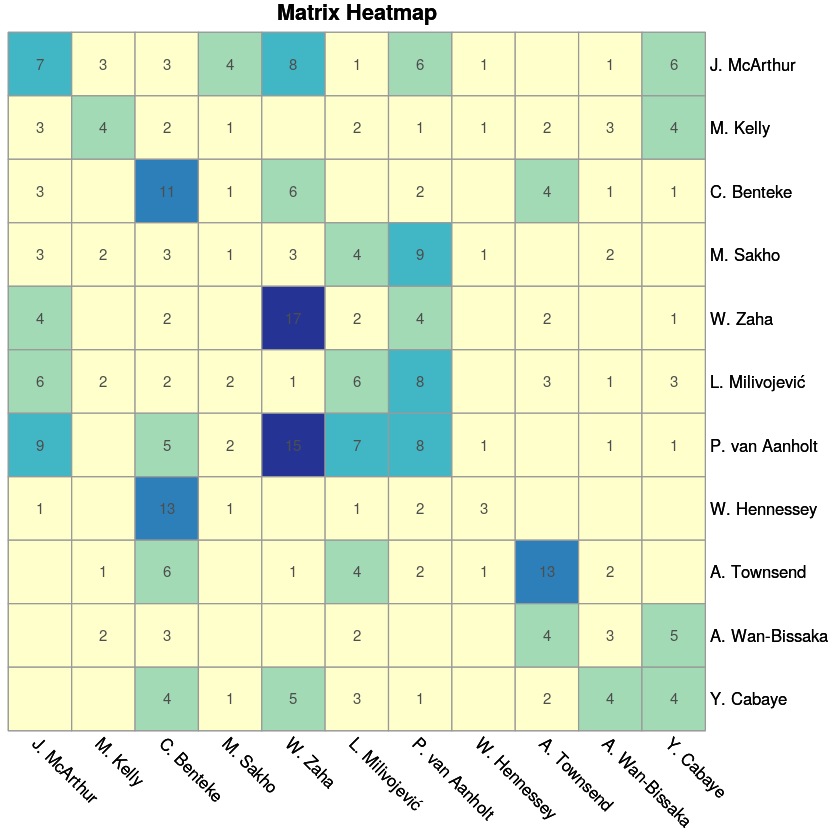

In [402]:
MatrixHeatMap(
    AdjacencyMatrix(g)[1:11,1:11]

)

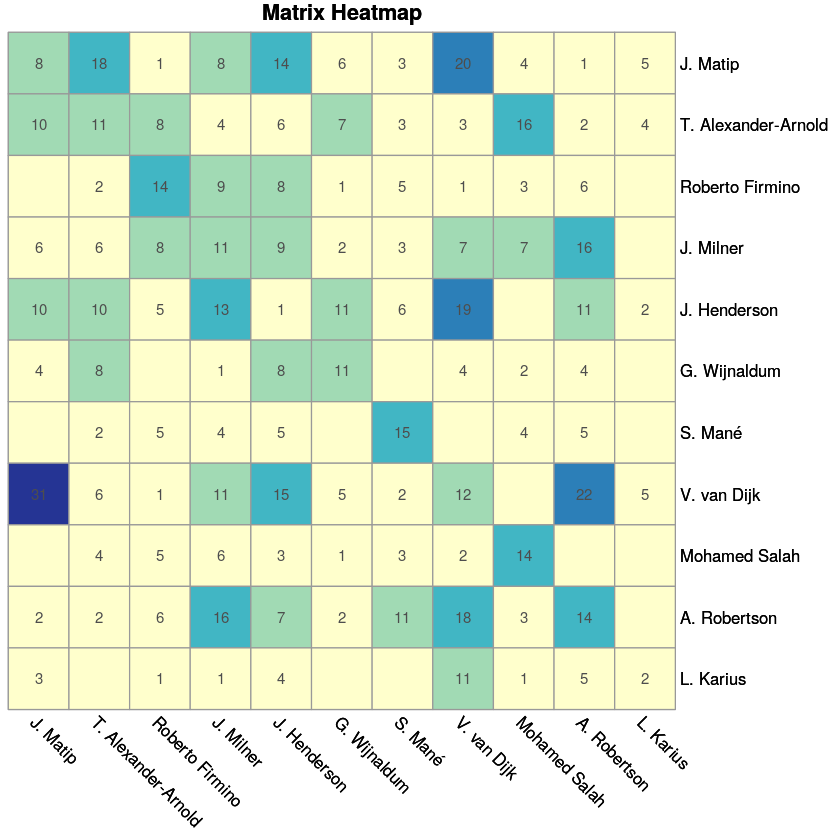

In [403]:
MatrixHeatMap(
    AdjacencyMatrix(
        GameGraph(events, match_id, home_or_away='Away'))[1:11,1:11]
)

Warning message in brewer.pal(15, "YlGnBu"):
“n too large, allowed maximum for palette YlGnBu is 9
Returning the palette you asked for with that many colors
”Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on 'L. Milivojević' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(t, units = "in", cex = fontsize_col/fontsize):
“conversion failure on 'L. Milivojević' in 'mbcsToSbcs': dot substituted for <87>”Warning message in strwidth(t, units = "in", cex = fontsize_row/fontsize):
“conversion failure on 'L. Milivojević' in 'mbcsToSbcs': dot substituted for <c4>”Warning message in strwidth(t, units = "in", cex = fontsize_row/fontsize):
“conversion failure on 'L. Milivojević' in 'mbcsToSbcs': dot substituted for <87>”

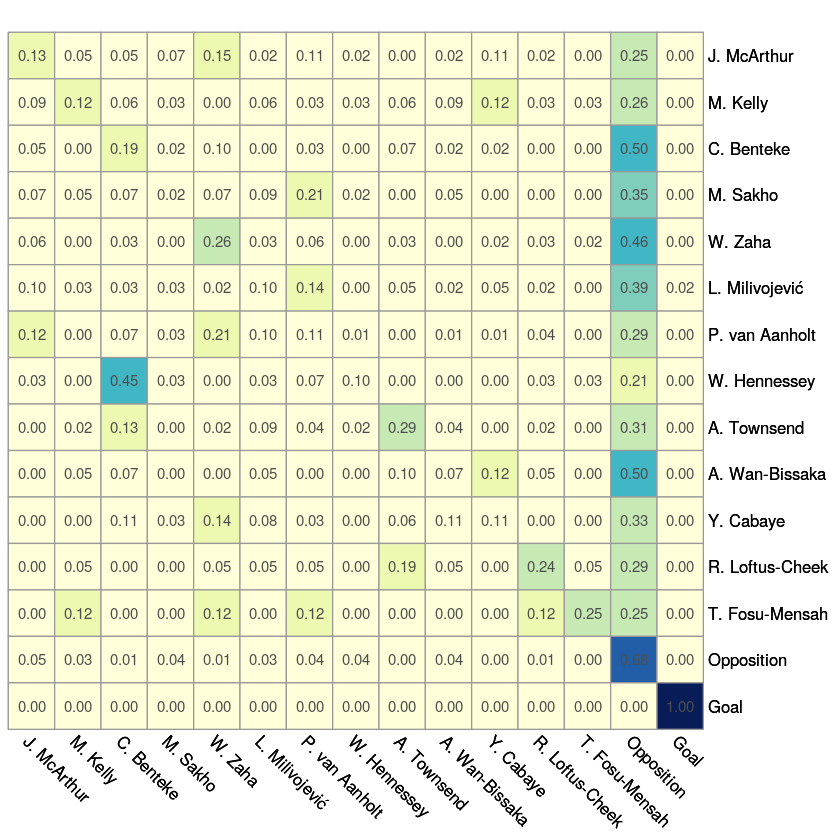

In [416]:
MatrixHeatMap(
    TransitionMatrix(
        GameGraph(events, match_id, home_or_away='Home')), 
    number_format='%.2f',
    title=''
)

Warning message in brewer.pal(15, "YlGnBu"):
“n too large, allowed maximum for palette YlGnBu is 9
Returning the palette you asked for with that many colors
”

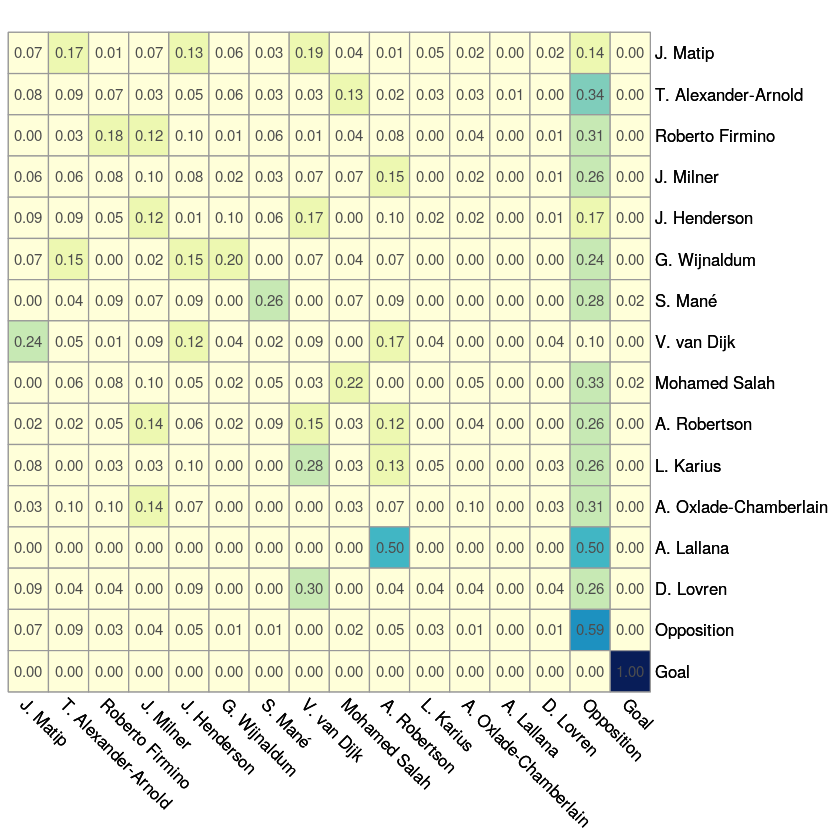

In [415]:
MatrixHeatMap(
    TransitionMatrix(
        GameGraph(events, match_id, home_or_away='Away')), 
    number_format='%.2f',
    title=''
)

In [56]:
GoalSeqs <- function(events, match_id) {
    match <- events[events$matchId==match_id,]
    goals <- match[match$subEventName=='Goal',]
    goal_seqs <- unique(goals$possession)   
    return(goal_seqs)
}

In [114]:
TabulateSequence <- function(events, possession_sequence) {
    # Return a markdown table starting from the row before a possession sequence begins, and continuing until it ends.
    
    start <- min(events[events$possession == possession_sequence,]$X)
    stop <- max(events[events$possession == possession_sequence,]$X) + 1
    table <- events[start:stop,]
    df <- data.frame(table$matchPeriod, table$time, table$team, table$source, table$subEventName)
    names(df) <- c('Half', 'Time', 'Team', 'Event Description', 'Player')
    
    return(kable(df))
}

In [115]:
sequence <- '2500032-91-Liv-0'

In [116]:
TabulateSequence(events, sequence)



|Half |Time  |Team           |Event Description     |Player                |
|:----|:-----|:--------------|:---------------------|:---------------------|
|2H   |38:07 |Crystal Palace |W. Hennessey          |Goal kick             |
|2H   |38:12 |Liverpool      |J. Matip              |Air duel              |
|2H   |38:12 |Crystal Palace |C. Benteke            |Air duel              |
|2H   |38:15 |Liverpool      |L. Karius             |Hand pass             |
|2H   |38:18 |Liverpool      |V. van Dijk           |Touch                 |
|2H   |38:22 |Liverpool      |V. van Dijk           |Simple pass           |
|2H   |38:23 |Liverpool      |J. Milner             |High pass             |
|2H   |38:27 |Liverpool      |T. Alexander-Arnold   |Simple pass           |
|2H   |38:30 |Liverpool      |A. Oxlade-Chamberlain |Touch                 |
|2H   |38:31 |Liverpool      |T. Alexander-Arnold   |Simple pass           |
|2H   |38:32 |Liverpool      |J. Henderson          |Simple pass          

In [148]:
SequenceOnPitch <- function(events, possession_sequence){
    #' Draw Possession Sequence on Pitch
    
    data <- events[events$possession == possession_sequence,]

    p <- DrawPitch(theme='grass') + 
        geom_label_repel(data = data, aes(location_x, location_y, label = paste(source,time)), label.padding=0.1, size=2.3, alpha=1) +
        geom_curve(data = data, aes(x = location_x, xend = target_x, y = location_y, yend = target_y*.99, col = X), 
                   show.legend=FALSE, size=1, alpha = 1) +
        geom_point(data = data, aes(location_x , location_y, shape=eventName), size=2) + 
        ggtitle(paste0(nrow(data),'-part ', unique(data$team)[1], ' Possession Sequence ending with ', 
                       data[nrow(data),]$subEventName, ' by ', data[nrow(data),]$source))  +
        theme(legend.position=c(0.5,0.08), legend.direction='horizontal', legend.title=element_blank())
    
    return(p)
}

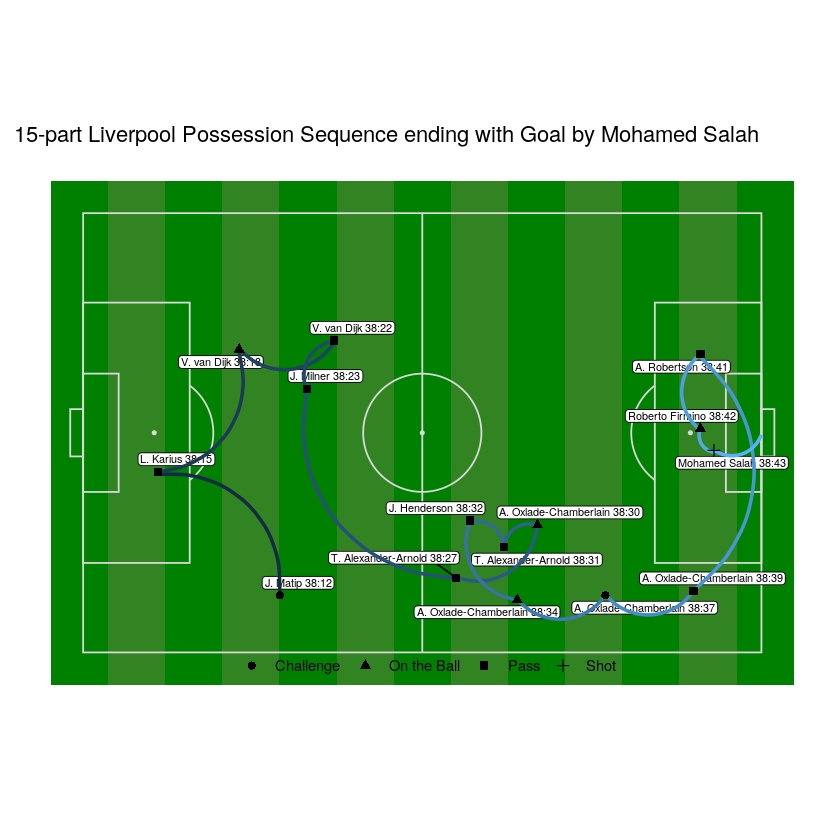

In [149]:
SequenceOnPitch(events, sequence)

youtube clip
<img src="../figures/youtube_clip.gif" width='700'>

In [159]:
SequenceGraph <- function(events, possession_sequence){
    #' Return Graph of Possession Sequence
    
    data <- events[events$possession == possession_sequence,]
    data <- data[data$source!='' & data$target!='nan',]
    nodes <- unique(c(as.character(data$source),as.character(data$target)))
    edges <- data.frame(data$source, data$target)
    g <- graph_from_data_frame(d=edges, vertices=nodes, directed=TRUE)
    g$id <- possession_sequence
    g$data <- data
    g$team <- as.character(unique(data$team))
    
    return(g)
}

In [122]:
VisualizeGraph <- function(possession_sequence_graph) {
    #' Visualize Possession Sequence as Linear Graph with Looping Edges
    
    g <- possession_sequence_graph
    data <- possession_sequence_graph$data
    
    visualization <- ggraph(g, 'linear') + 
        geom_edge_arc(aes(color=data$eventName), 
                      arrow=arrow(length=unit(4,'mm')), 
                      fold=F,
                     width=1) +
        geom_edge_loop(aes(color=data$eventName),
                      width=1) +
        geom_node_point(color='black', 
                        size=2,
                        alpha=0.5) +
        geom_node_text(aes(label = name), 
                        repel=T, 
                        angle=90, hjust=2, ) +
        scale_edge_colour_manual(
            values=c('indianred3', 'wheat4', 'grey', 'grey30',
                    'red','blue','green','orange','purple','brown','pink'
                    ),
            name='Event Type') +
        theme_void()
   
    return(visualization)
    
}

In [120]:
g <- SequenceGraph(events, sequence)

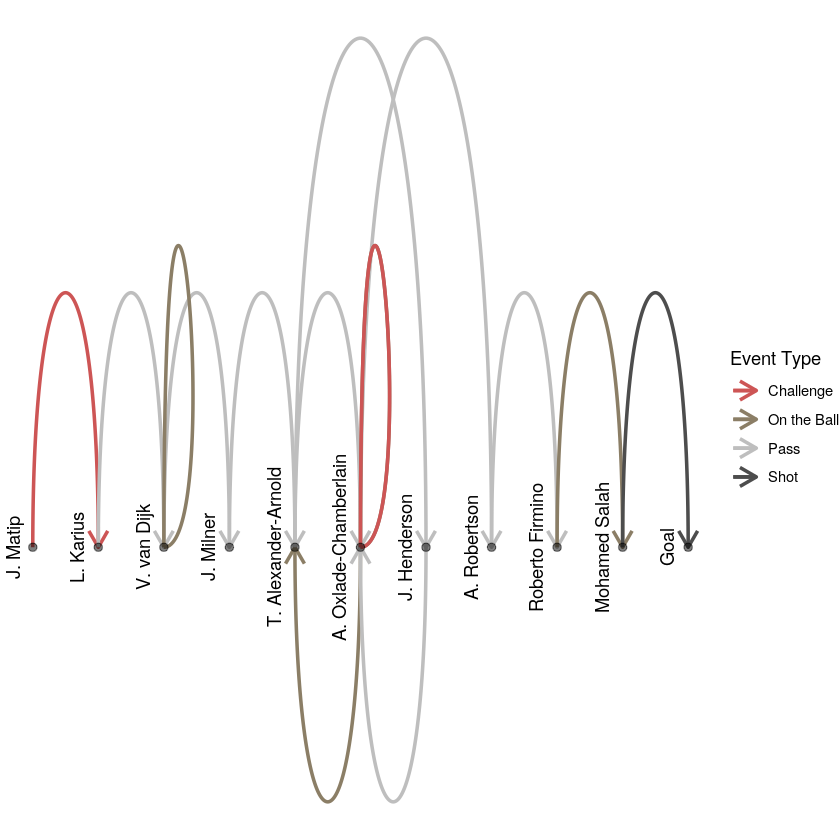

In [123]:
VisualizeGraph(g)

In [152]:
GetGraphMetrics <- function(possession_graph) {
    #' Return basic metrics for given Graph
    
    g <- possession_graph
    path_metrics <- c(g$id, g$team, length(V(g)), length(E(g)), 
                      diameter(g), mean_distance(g), edge_density(g, loops=T), 
                      girth(g)$girth, transitivity(g), authority_score(g)$value, hub_score(g)$value)
    names(path_metrics) <- c('Label', 'Team', 'Nodes', 'Edges', 'Diameter', 'Mean_Distance', 
                             'Edge_Density', 'Girth', 'Transitivity', 'Authority_Score', 'Hub_Score')
    
    return(path_metrics)
}

In [166]:
GetNodeMetrics <- function(possession_graph) {
    #' Return metrics for each Node of given Graph
    
    g <- possession_graph
    df <- data.frame(page_rank(g)$vector)
    names(df) <- 'pagerank'
    df$in_degree <- degree(g, mode='in')
    df$out_degree <- degree(g, mode='out')
    df$eccentricity <- eccentricity(g)
    df$closeness <- closeness(g)
    df$betweenness <- betweenness(g)
    df$norm_betweenness <- betweenness(g, normalized=T)
    df$alpha_centrality <- alpha_centrality(g)
    df$power_centrality <- power_centrality(g)
    df$eigen_centrality <- eigen_centrality(g)$vector
    df$authority <- authority_score(g)$vector
    df$hub <- hub_score(g)$vector
    
    return(df)
}

In [165]:
GetEdgeMetrics <- function(possession_graph) {
    #' Return metrics for each Edge of given Graph
    
    g <- possession_graph
    df <- data.frame(as_edgelist(g))
    names(df) <- c('Source','Target')
    df$sequence <- 1:length(E(g))
    df$edge_betweenness <- edge_betweenness(g)
    
    return(df)
}

In [42]:
GetGraphMetrics(g)

Possession_Sequence               Nodes               Edges            Diameter 
 "2500032-91-Liv-0"                "11"                "15"                 "9" 
      Mean_Distance        Edge_Density               Girth        Transitivity 
 "3.44827586206897"  "0.12396694214876"                 "3" "0.230769230769231" 
    Authority_Score           Hub_Score 
  "7.6985322344547"   "7.6985322344547"

In [95]:
GetNodeMetrics(match_graph)

ERROR: Error in GetNodeMetrics(match_graph): could not find function "GetNodeMetrics"


In [44]:
GetEdgeMetrics(g)

Source,Target,sequence,edge_betweenness
<fct>,<fct>,<int>,<dbl>
J. Matip,L. Karius,1,10
L. Karius,V. van Dijk,2,18
V. van Dijk,V. van Dijk,3,0
V. van Dijk,J. Milner,4,24
J. Milner,T. Alexander-Arnold,5,28
T. Alexander-Arnold,A. Oxlade-Chamberlain,6,25
A. Oxlade-Chamberlain,T. Alexander-Arnold,7,3
T. Alexander-Arnold,J. Henderson,8,6
J. Henderson,A. Oxlade-Chamberlain,9,6


In [45]:
sequence2 <- '2499858-18-Liv-5'

In [46]:
TabulateSequence(sequence2)



|Half |Time  |Team       |Event Description     |Player      |
|:----|:-----|:----------|:---------------------|:-----------|
|1H   |15:57 |Stoke City |M. Diouf              |Clearance   |
|1H   |16:03 |Liverpool  |S. Mané               |Simple pass |
|1H   |16:06 |Liverpool  |Alberto Moreno        |Simple pass |
|1H   |16:09 |Liverpool  |D. Lovren             |Simple pass |
|1H   |16:13 |Liverpool  |G. Wijnaldum          |Simple pass |
|1H   |16:16 |Liverpool  |E. Can                |Simple pass |
|1H   |16:18 |Liverpool  |G. Wijnaldum          |Simple pass |
|1H   |16:22 |Liverpool  |J. Matip              |Simple pass |
|1H   |16:27 |Liverpool  |A. Oxlade-Chamberlain |Simple pass |
|1H   |16:28 |Liverpool  |J. Gomez              |Cross       |
|1H   |16:31 |Liverpool  |D. Solanke            |Smart pass  |
|1H   |16:33 |Liverpool  |S. Mané               |Goal        |

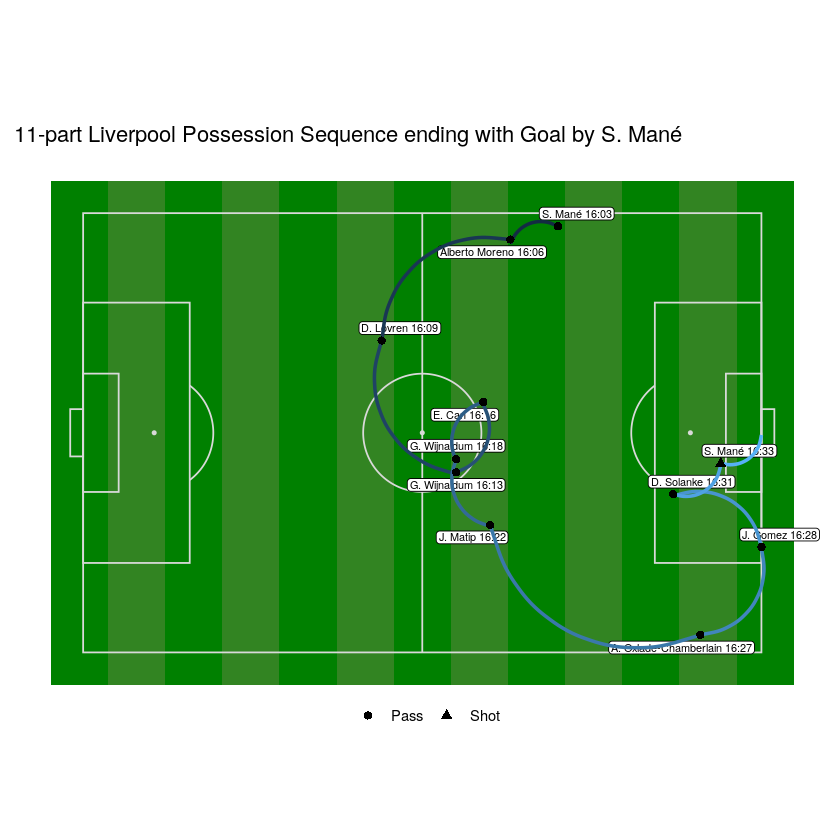

In [233]:
SequenceOnPitch(sequence2)

<img src='../figures/mane_vs_stoke.gif'>

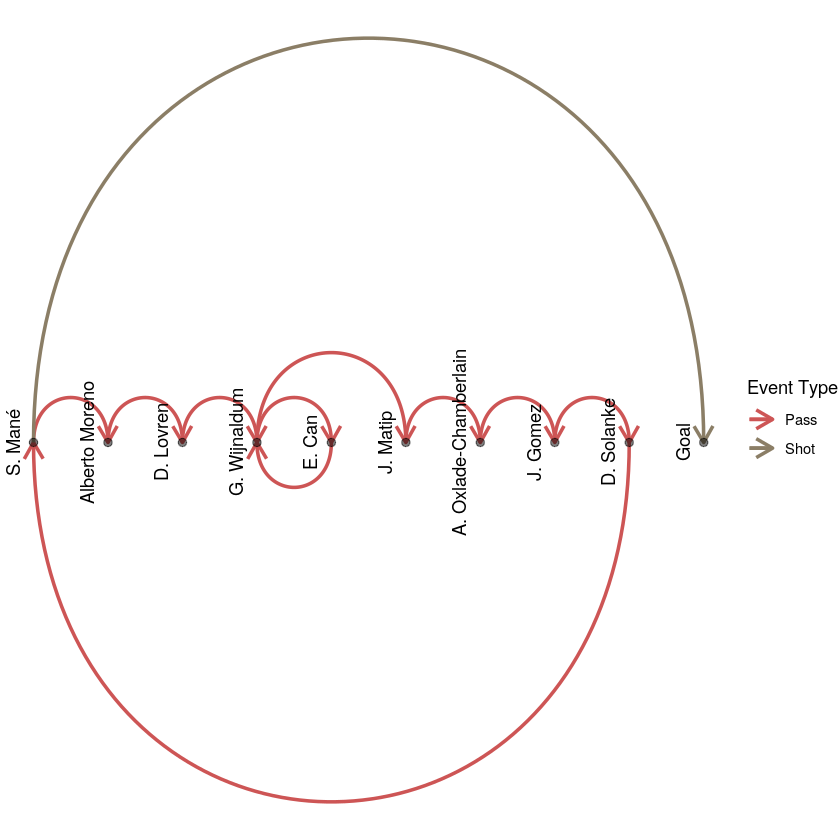

In [48]:
g2 <- SequenceGraph(sequence2)
VisualizeGraph(g2)

In [49]:
GetGraphMetrics(g2)

Possession_Sequence               Nodes               Edges            Diameter 
 "2499858-18-Liv-5"                "10"                "11"                 "8" 
      Mean_Distance        Edge_Density               Girth        Transitivity 
 "4.18518518518519"              "0.11"                 "8"                 "0" 
    Authority_Score           Hub_Score 
                "2"                 "2"

In [50]:
sequence3 <-  '2499889-18-Liv-0'

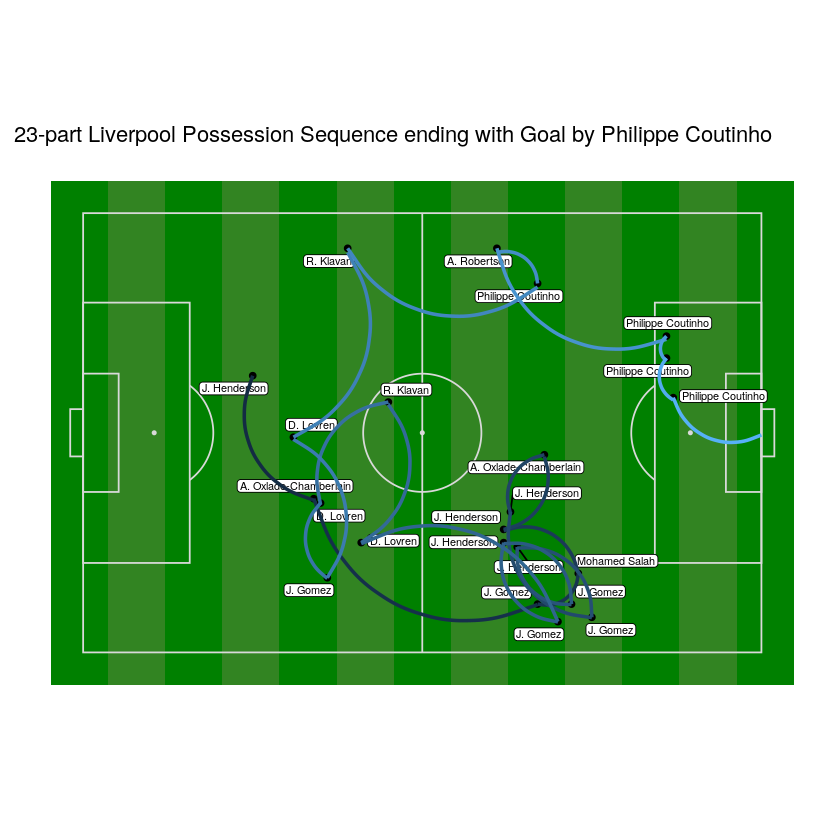

In [51]:
SequenceOnPitch(sequence3)

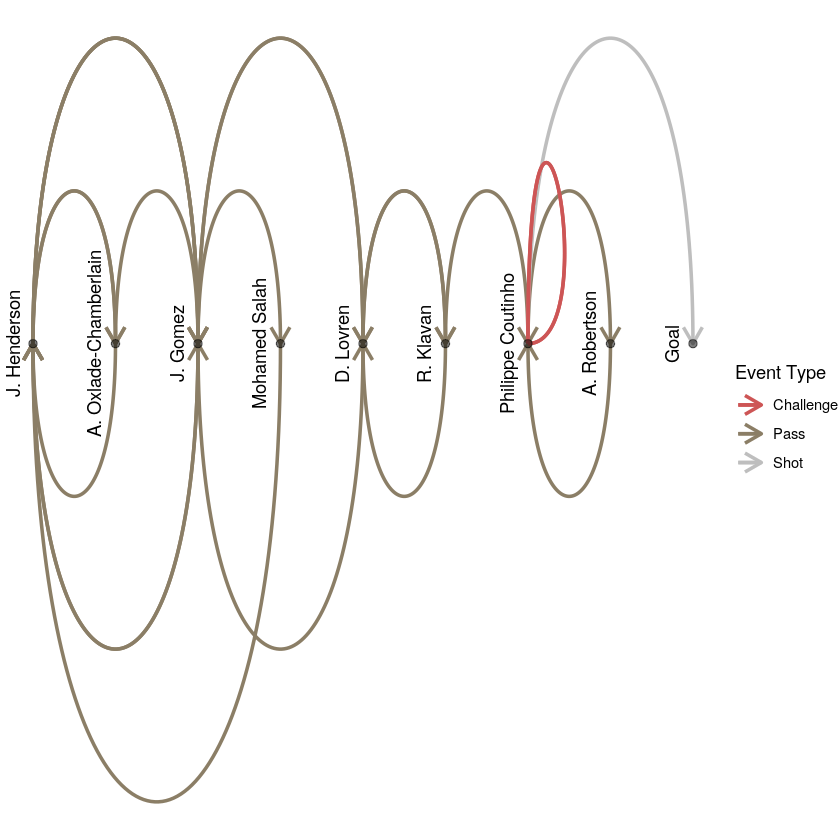

In [52]:
g3 <- SequenceGraph(sequence3)
VisualizeGraph(g3)

In [53]:
GetGraphMetrics(g3)

Possession_Sequence               Nodes               Edges            Diameter 
 "2499889-18-Liv-0"                 "9"                "23"                 "6" 
      Mean_Distance        Edge_Density               Girth        Transitivity 
 "2.55769230769231" "0.283950617283951"                 "3"             "0.375" 
    Authority_Score           Hub_Score 
 "14.8411323378424"  "14.8411323378424"

<img src="../figures/youtube_clip2.gif">